<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض ۲
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
●	آیا به طور میانگین تفاوت مشهودی میان ارزش خانه‌های شهری و روستایی مشاهده میکنید؟
</font>
</p>

In [74]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm, expon, boxcox, shapiro

In [75]:
# utility functions
def remove_outliers_iqr(df_col):
    """
    Remove outliers from a pandas Series using the IQR method.

    Parameters:
    df_col (pd.Series): The column from which outliers need to be removed.

    Returns:
    pd.Series: The column with outliers removed.
    """
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_cleaned_col = df_col[(df_col >= lower_bound) & (df_col <= upper_bound)]
    
    return df_cleaned_col
    
def check_normality_stat(data, alpha=0.1):
    """
    Check the normality of a sample distribution using the Shapiro-Wilk test.

    Parameters:
    data: array-like, the sample distribution to check.
    alpha: float, significance level to test against. Default is 0.05.

    Returns:
    bool: True if data is normally distributed (p-value > alpha), False otherwise.
    
    Interpretation: if the p value is less than the chosen alpha level, 
    then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
    """
    
    # Shapiro-Wilk Test
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p_value:.4f}")
    
    # return true if data is normally distributed
    return p_value > alpha


In [76]:
# file names and directories
data_dir = '../Data/'
R_files = ['R98', 'R99', 'R1400', 'R1401']
U_files = ['U98', 'U99', 'U1400', 'U1401']

In [77]:
def extract_home_values(files):
    home_values = []
    for file_name in files:
        values = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P3S04'))
        values = values['value']
        # drop rows with nan values
        values.dropna(axis=0, inplace=True)
        home_values.append(values)
    return home_values

In [78]:
R_home_values = extract_home_values(R_files)

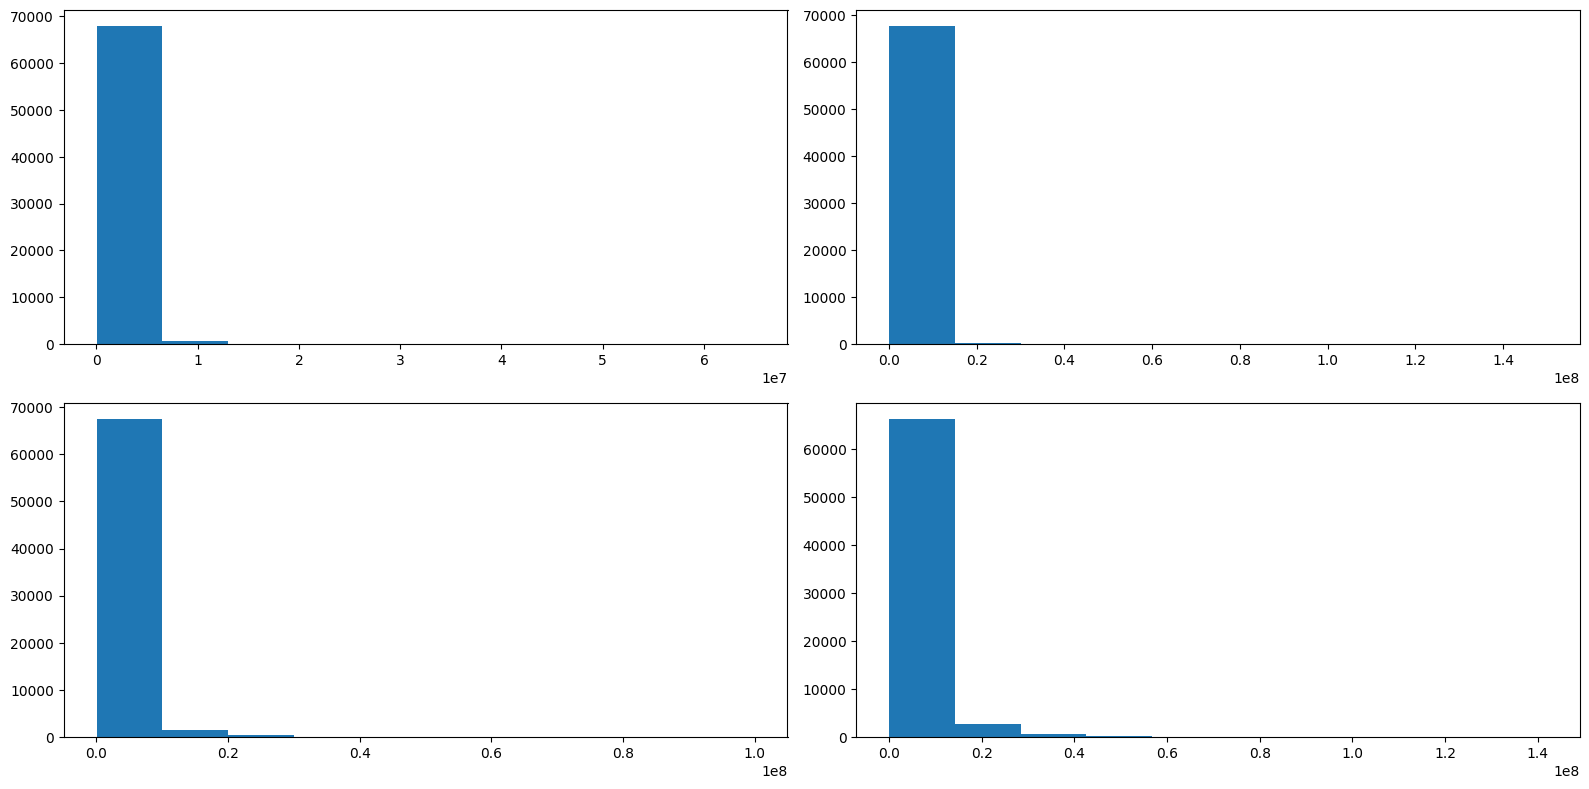

In [79]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_home_values[i])
plt.tight_layout()    
plt.show()

In [80]:
U_home_values = extract_home_values(U_files)

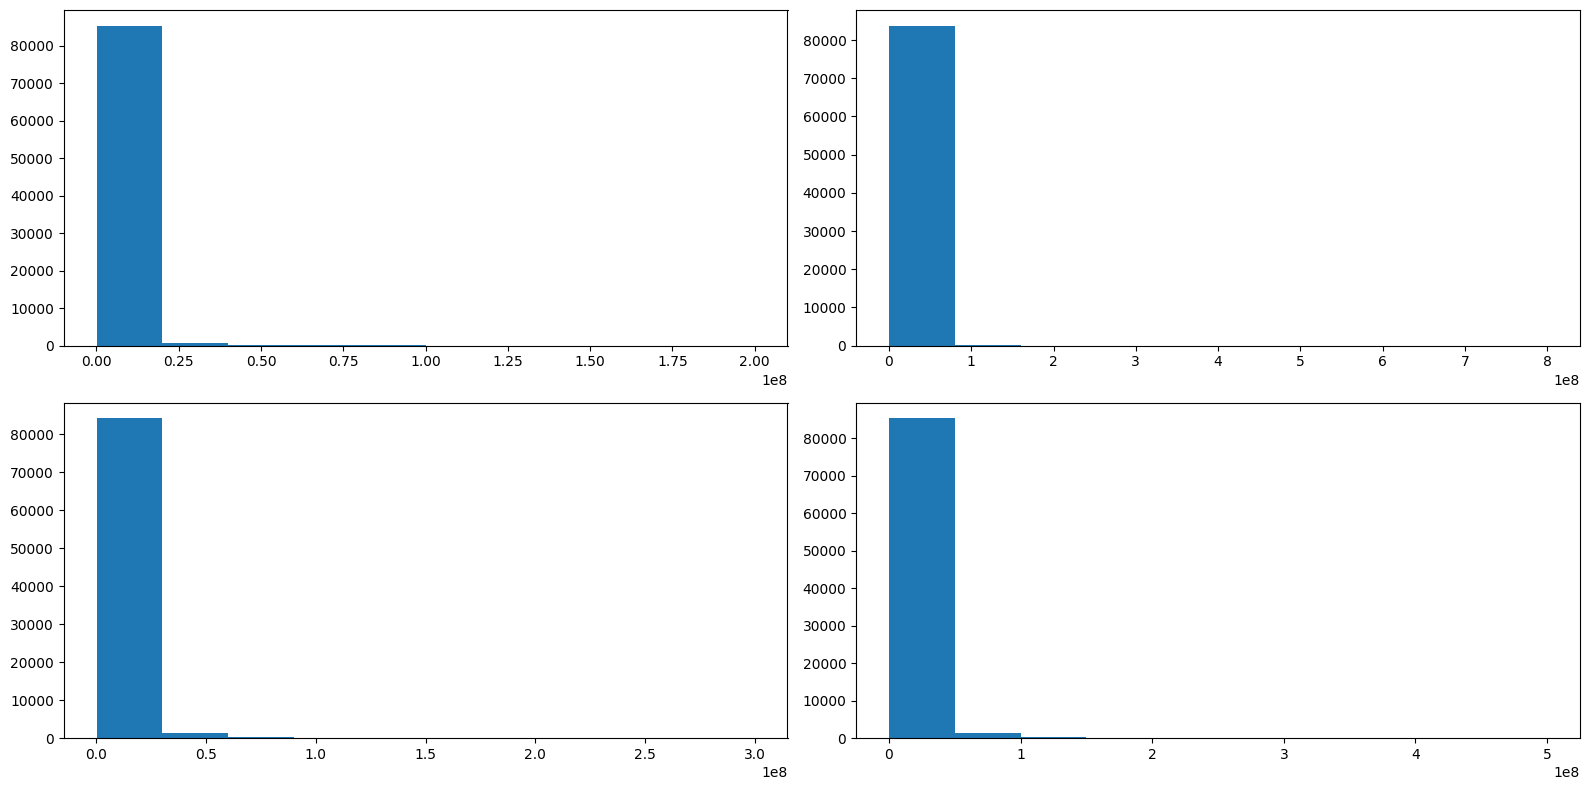

In [81]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_home_values[i])
plt.tight_layout()    
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بررسی نمودار هیستوگرام ارزش خانه‌های شهری و روستایی نشان می‌دهد که داده‌های پرت زیادی وجود دارند که با استفاده از روش 
iqr
داده‌ها ی پرت را حذف میکنیم.
بدین ترتیب فهم بهتری نسبت به میانگین واقعی ارزش خانه‌های شهری و روستایی خواهیم داشت 
</font>
</p>

In [82]:
# removing outliers from R home values
for i in range(4):
    R_home_values[i] =  remove_outliers_iqr(R_home_values[i])
    

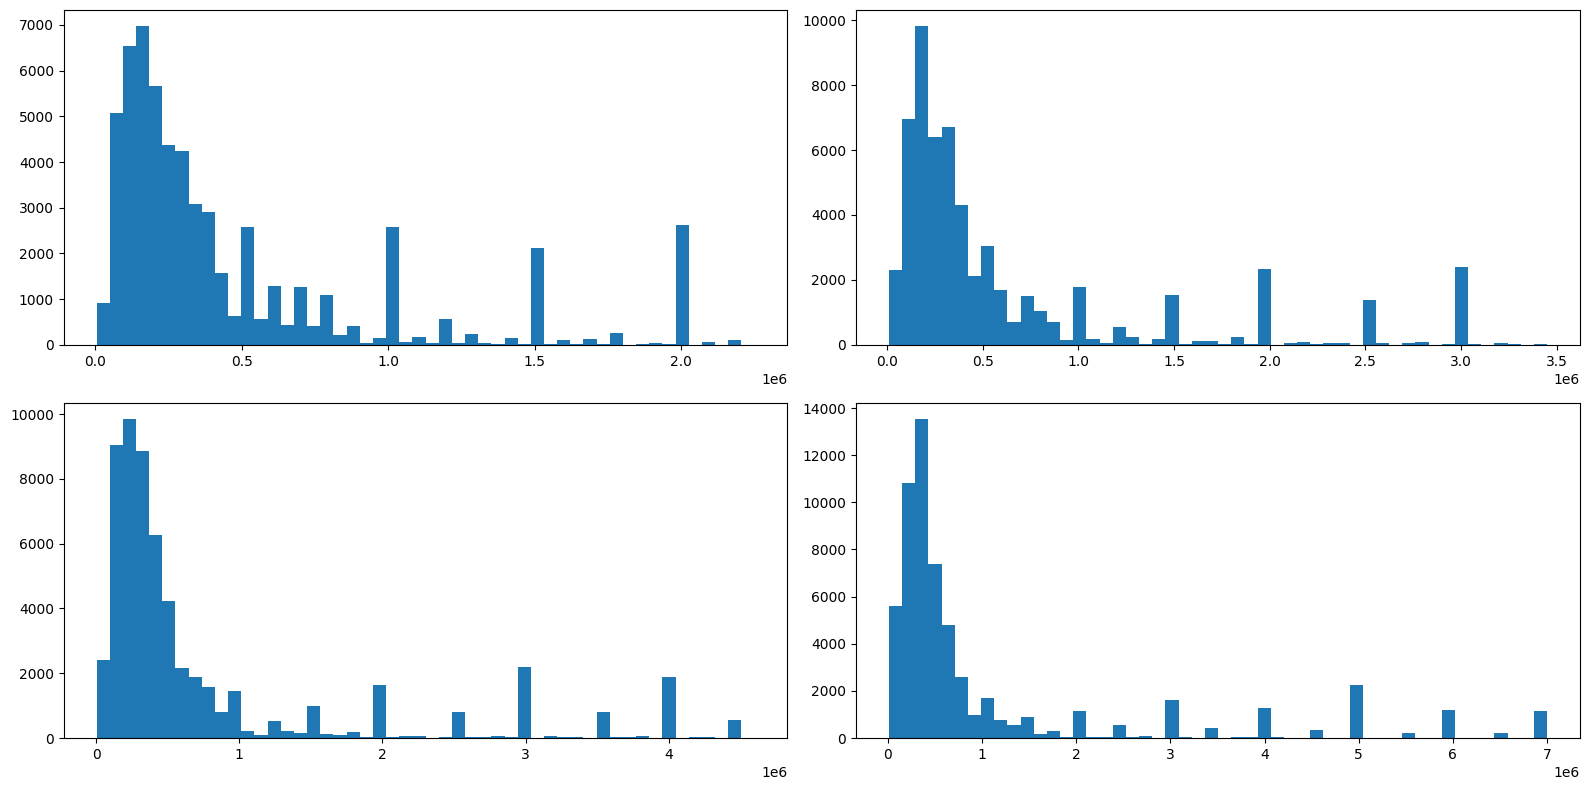

In [83]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_home_values[i], bins=50)
plt.tight_layout()    
plt.show()

In [84]:
# removing outliers from R home values
for i in range(4):
    U_home_values[i] =  remove_outliers_iqr(U_home_values[i])

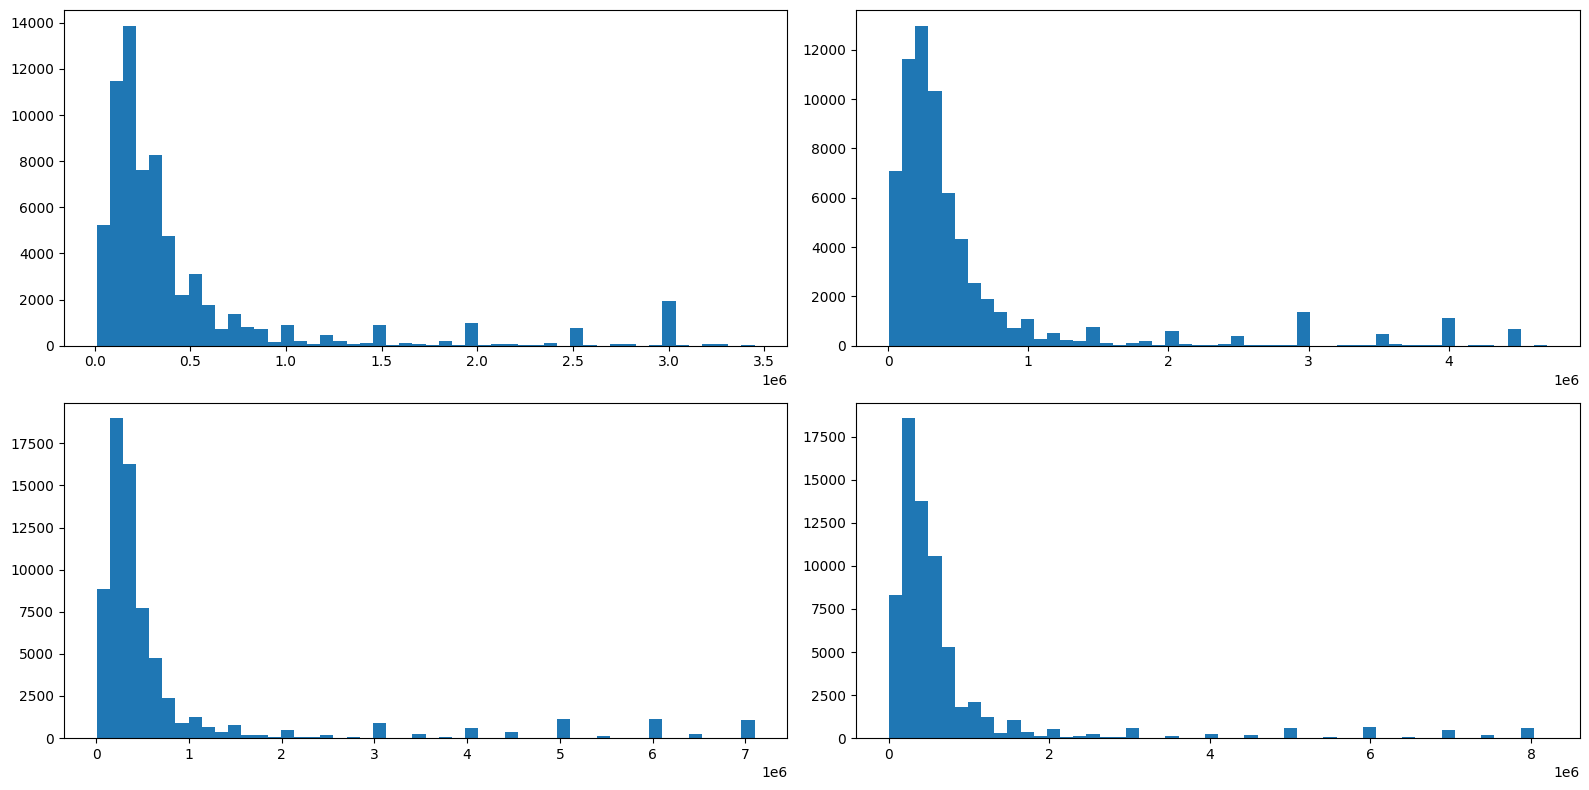

In [85]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_home_values[i], bins=50)
plt.tight_layout()    
plt.show()

In [86]:
# check normality of R home values
for i in range(4):
    is_normal = check_normality_stat(R_home_values[i])
    print(is_normal)

Shapiro-Wilk Test: Statistics=0.7447373992901404, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.6985231270004659, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.6534246278286505, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.6263185228639323, p-value=0.0000
False


e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59915.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59430.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59797.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61136.
  res = hypotest_fun_out(*samples, **kwds)


In [87]:
# check normality of U home values
for i in range(4):
    is_normal = check_normality_stat(U_home_values[i])
    print(is_normal)

Shapiro-Wilk Test: Statistics=0.5930579971091319, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.5528796496520572, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.49734651267342844, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.46384181664195145, p-value=0.0000
False


e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69653.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67593.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70247.
  res = hypotest_fun_out(*samples, **kwds)
e:\Programs\minicoda\envs\queraAI\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68527.
  res = hypotest_fun_out(*samples, **kwds)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از نمودارهای هیستوگرام ارزش خانه‌ها مشخص است که توزیع نمونه‌ها نرمال نیست. پس قبل از اعمال آزمون و محاسبه‌ی
p_value
با استفاده از
log_transform
آن‌ها را به توزیع نرمال نزدیک می‌کنیم.
</font>
</p>

In [88]:
# transforming samples
R_transformed = []
U_transformed = []
for i in range(4):
    r_temp = np.log(R_home_values[i])
    u_temp = np.log(U_home_values[i])
    R_transformed.append(r_temp)
    U_transformed.append(u_temp)

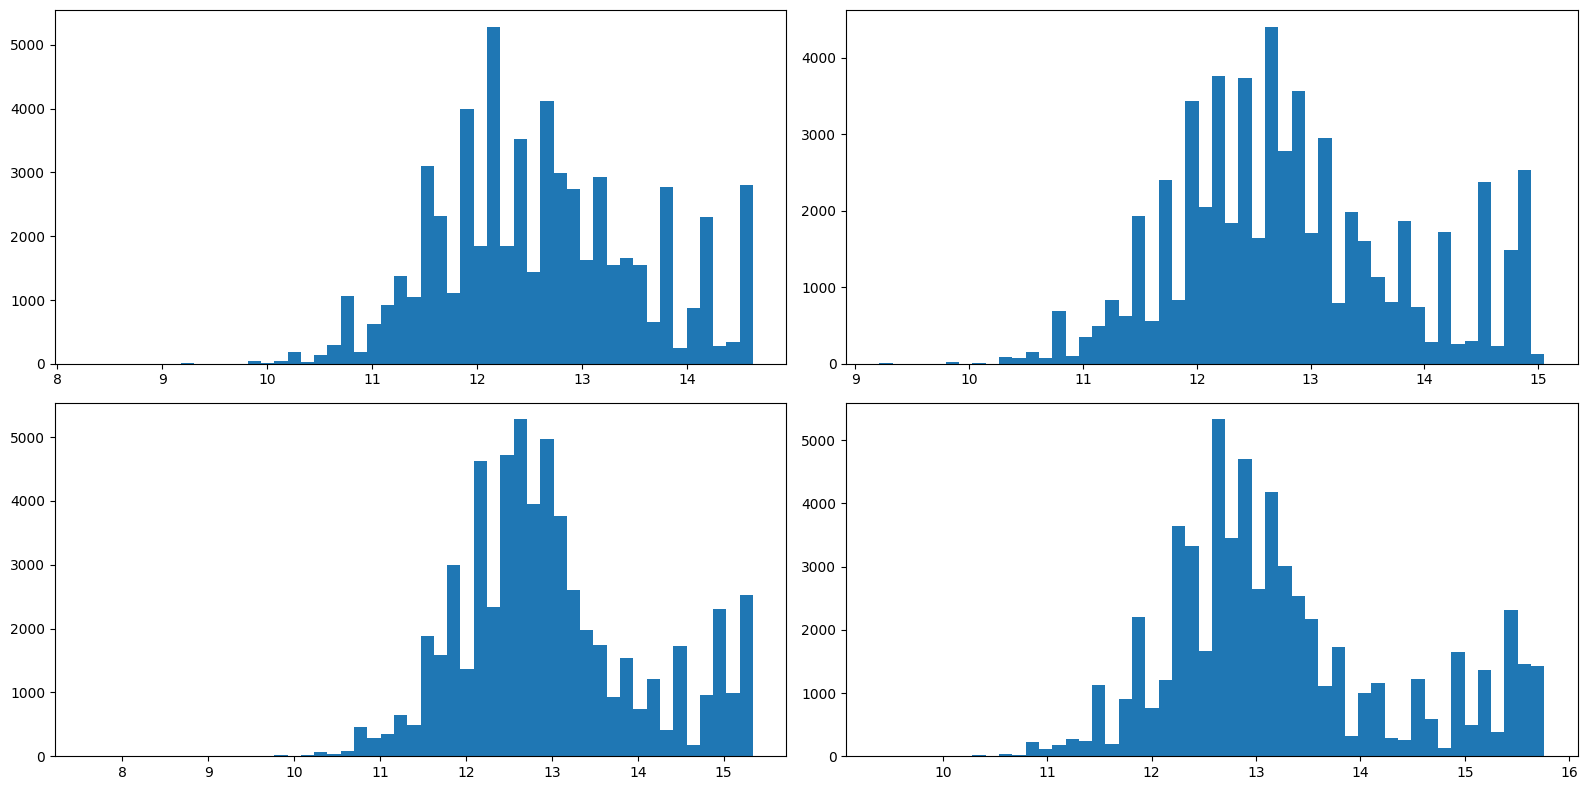

In [89]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_transformed[i], bins=50)
plt.tight_layout()    
plt.show()

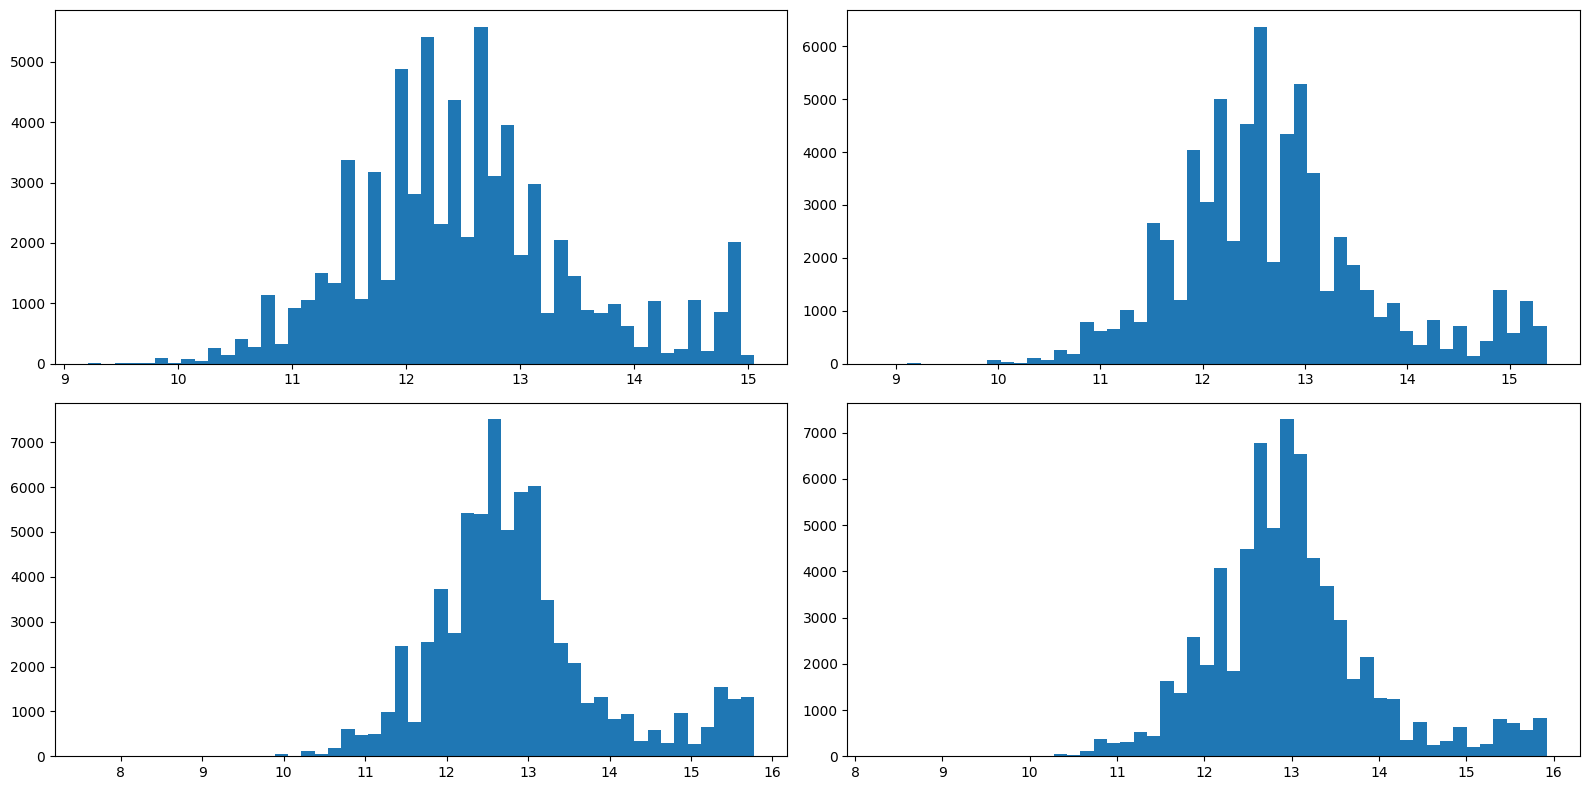

In [90]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_transformed[i], bins=50)
plt.tight_layout()    
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از 
transform
داده‌ها به توزیع نرمال نزدیک شده‌اند. حال تست فرض را بررسی می‌کنیم.
</font>
</p>

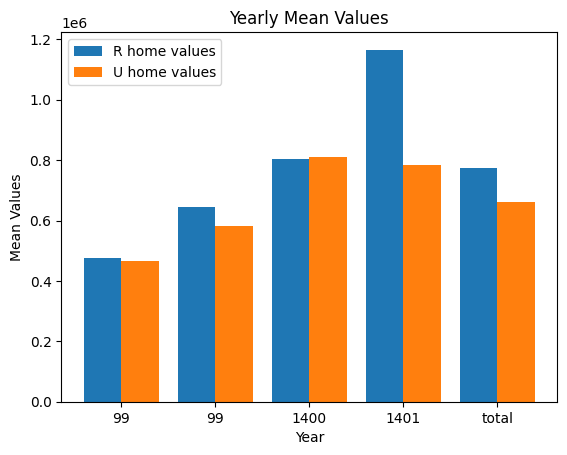

In [91]:
R_yearly_mean = []
U_yearly_mean = []
for i in range(4):
    R_yearly_mean.append(np.mean(R_home_values[i]))
    U_yearly_mean.append(np.mean(U_home_values[i]))

R_total_mean = np.mean(R_yearly_mean)
R_yearly_mean.append(R_total_mean) 
U_total_mean = np.mean(U_yearly_mean) 
U_yearly_mean.append(U_total_mean) 

# Set positions for the bars
bar_width = 0.4
x = np.arange(5)

# Plot bars for R home values
plt.bar(x - bar_width/2, R_yearly_mean, bar_width, label='R home values', color='#1f77b4')

# Plot bars for U home values
plt.bar(x + bar_width/2, U_yearly_mean, bar_width, label='U home values', color='#ff7f0e')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.title('Yearly Mean Values')
plt.xticks(x, ['99', '99', '1400', '1401', 'total'])  # Set x-ticks to the year labels
plt.legend()  # Show the legend

# Show the plot
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار میانگین‌ها فرض صفر را به صورت زیر تعریف می‌کنیم:
میانگین ارزش خانه‌های شهری بیشتر از میانگین ارزش خانه‌های روستایی است.
</font>
</p>

\begin{align*}
& H_{0}: \mu_{R} > \mu_{U}\\
& H_{1}: \mu_{R} <= \mu_{U}\\
\end{align*}

In [92]:
# year 1398
t_statistic, p_value = sp.stats.ttest_ind(U_home_values[0], R_home_values[0],  alternative='greater')
round(p_value,2)

1.0

In [93]:
# year 1399
t_statistic, p_value = sp.stats.ttest_ind(U_home_values[1], R_home_values[1], alternative='greater')
round(p_value,2)

1.0

In [94]:
# year 1400
t_statistic, p_value = sp.stats.ttest_ind(U_home_values[2], R_home_values[2], alternative='greater')
round(p_value,2)

0.1

In [95]:
# year 1401
t_statistic, p_value = sp.stats.ttest_ind(U_home_values[3], R_home_values[3], alternative='greater')
round(p_value,2)

1.0

In [96]:
# total
t_statistic, p_value = sp.stats.ttest_ind(pd.concat(v for v in U_home_values), pd.concat(v for v in R_home_values), alternative='greater')
round(p_value,2)


1.0

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سال‌هایی که داریم و در مجموع  هر چهار سال مقدار
p_value
از سطح اطمینان
0.1
بیشتر است پس فرض اولیه نمی‌تواند رد شود.
البته در سال ۱۴۰۰ مقدار
p_value
کمتر است که نشان‌ می‌دهد ارزش خانه‌ها به طور میانگین در مناطق شهری و روستایی به هم نزدیک‌تر بوده است.
</font>
</p>